In [1]:
import numpy as np
import pandas as pd 
import mne

In [2]:
data = pd.read_csv('Data/small_set.csv')
data = data.rename (columns = {'sample':'time'})
data = data.drop (columns = ['Unnamed: 0'])
data.tail()

,time,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,...,TP8,X,Y,nd,trial_no,patient_no,alcoholic,match,err,file_loc
15355,251,-5.259,-7.273,-3.072,-11.261,-5.290,-4.211,0.081,-0.590,-6.816,...,-14.079,-5.819,-6.744,-2.706,co2c0000337.rd.089.gz,c_n_co2c0000337,False,nomatch,False,./Data/smni_eeg_data\c_n_co2c0000337\co2c00003...
15356,252,-6.724,-8.250,-2.584,-8.820,-6.755,-2.258,-0.895,-0.590,-5.839,...,-15.055,-6.307,-4.791,-5.636,co2c0000337.rd.089.gz,c_n_co2c0000337,False,nomatch,False,./Data/smni_eeg_data\c_n_co2c0000337\co2c00003...
15357,253,-8.677,-9.226,-6.002,-6.866,-8.708,-0.305,5.941,-2.543,-2.909,...,-14.079,-5.819,-4.303,-8.565,co2c0000337.rd.089.gz,c_n_co2c0000337,False,nomatch,False,./Data/smni_eeg_data\c_n_co2c0000337\co2c00003...
15358,254,-11.607,-9.715,-11.861,-7.843,-10.173,-0.793,4.476,-5.961,-1.444,...,-11.149,-6.307,-6.744,-11.495,co2c0000337.rd.089.gz,c_n_co2c0000337,False,nomatch,False,./Data/smni_eeg_data\c_n_co2c0000337\co2c00003...
15359,255,-14.537,-10.691,-18.209,-10.284,-12.126,-2.747,-3.337,-8.403,-2.421,...,-8.708,-8.748,-11.627,-14.425,co2c0000337.rd.089.gz,c_n_co2c0000337,False,nomatch,False,./Data/smni_eeg_data\c_n_co2c0000337\co2c00003...


In [3]:
df = data[data['patient_no'] == 'a_1_co2a0000364']
df = df.drop (columns = ['trial_no','patient_no', 'alcoholic', 'match', 'err', 'file_loc'])
df.head()


,time,AF1,AF2,AF7,AF8,AFZ,C1,C2,C3,C4,...,PO8,POZ,PZ,T7,T8,TP7,TP8,X,Y,nd
0,0,-2.146,1.129,-16.856,-10.020,-0.987,-1.129,2.747,-2.716,-0.926,...,5.157,-6.266,-2.797,-6.805,-3.886,-9.338,-3.082,-5.269,-5.636,-8.901
1,1,-2.146,0.641,-7.090,-7.090,-1.475,-1.617,-1.160,-3.204,-2.879,...,7.111,-8.708,-4.262,-9.247,-5.839,-12.268,-4.059,-5.758,-2.706,-7.924
2,2,-1.658,-0.336,7.558,1.211,-0.987,0.336,0.305,1.678,2.492,...,-2.655,-9.196,-4.262,-8.270,-4.374,-8.850,-3.571,-2.828,1.689,-3.042
3,3,-0.682,-0.824,19.277,10.488,-0.010,0.824,0.305,-0.275,2.981,...,-7.050,-6.755,-2.797,-3.876,0.020,-1.526,-1.129,1.567,5.595,4.771
4,4,2.248,0.641,23.183,13.906,2.431,2.777,2.258,4.608,5.910,...,-4.120,-3.337,-0.844,1.495,4.415,4.822,2.777,5.961,9.013,11.607


In [4]:
def threeDimensional_dfprep (df):
    #Collects all channels from dataframe except the 'time' column
    cols = [col for col in df.columns.tolist() if col.__contains__('time') is False]
    #Encodes all channels to a number
    channelEncoder = {col:int(index) for index, col in enumerate (cols)}
    #Stores a list of dataframes 
    df_list = []

    for col in cols:#Iterates through each channel
        tempDF = df.copy() #creates copy of dataframe to be analyzed

        #Encodes the current channel as an integer in a new column, and changes the name of the corresponding column to voltage
        tempDF['channel'] = channelEncoder[col]
        tempDF = tempDF.rename (columns = {col:'voltage'})    

        #Filters the dataframe for only the currently analyzed time, voltage and channel columns
        tempDF = tempDF[['time','voltage','channel']]
        #Adds filtered dataframe into a list of dataframes
        df_list.append (tempDF)


    #Concats the list of dataframes into one larger dataframe
    threeDimensional_df = pd.concat(df_list)
    return threeDimensional_df

#threeDimensional_df = threeDimensional_dfprep(df)


In [6]:
def plot_threeDimensional_df (df, plt_title, minVal, maxVal):

    font_size = 16
    
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig = plt.figure(figsize = (12,14))
    ax = fig.gca(projection='3d')
    ax.plot_trisurf(df['channel'], df['time'], df['voltage'], cmap=plt.cm.viridis, vmin = minVal, vmax = maxVal, linewidth=0.2)
    
    ax.set_xlabel ('Channel', fontsize = font_size)
    ax.set_ylabel ('Time', fontsize = font_size)
    ax.set_zlabel ('Voltage', fontsize = font_size)
    ax.set_zlim3d(minVal*0.98,maxVal*1.02)
    ax.set_title (plt_title, fontsize= font_size*1.2 )
    
    plt.show()

#plot_threeDimensional_df (threeDimensional_df)    

C:\Users\Owner\AppData\Local\Temp/ipykernel_15732/3131194062.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


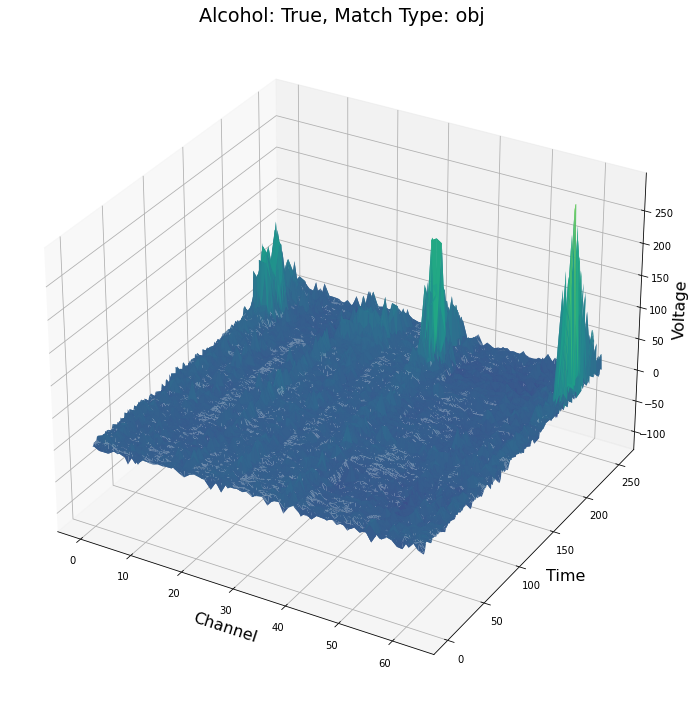

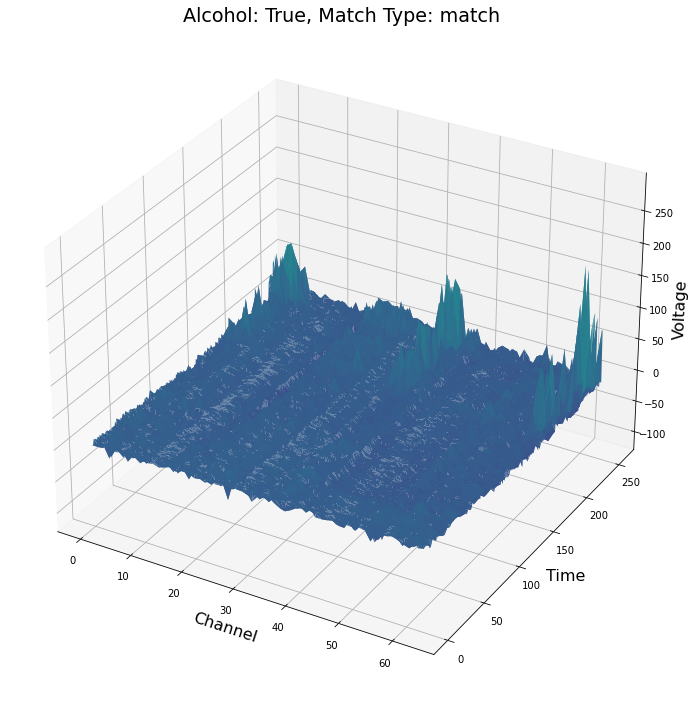

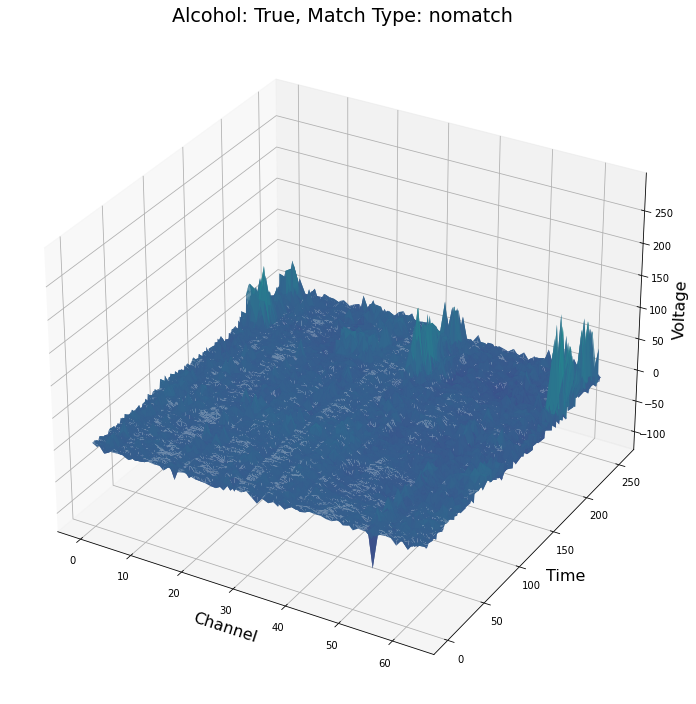

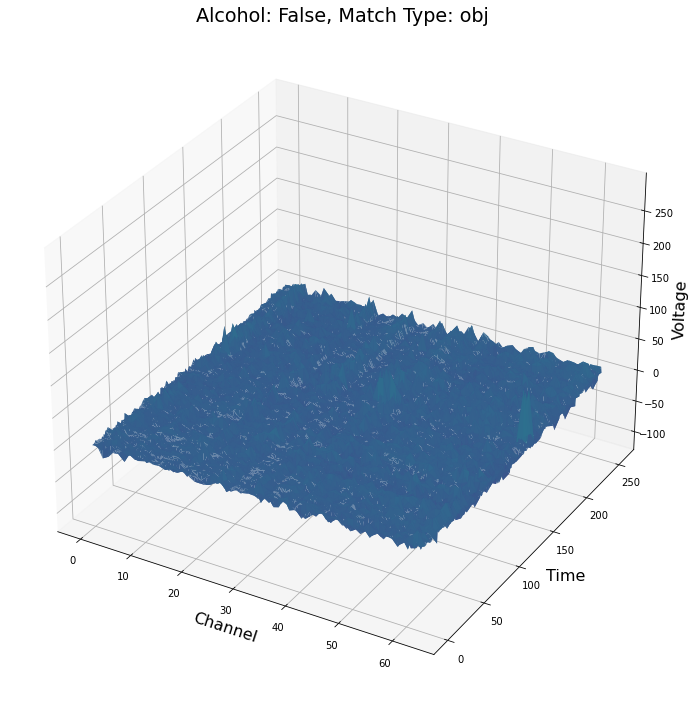

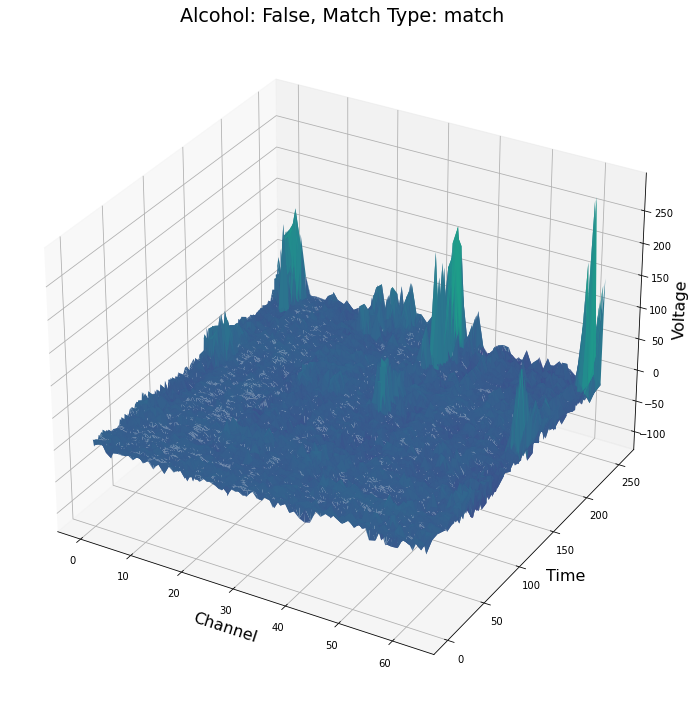

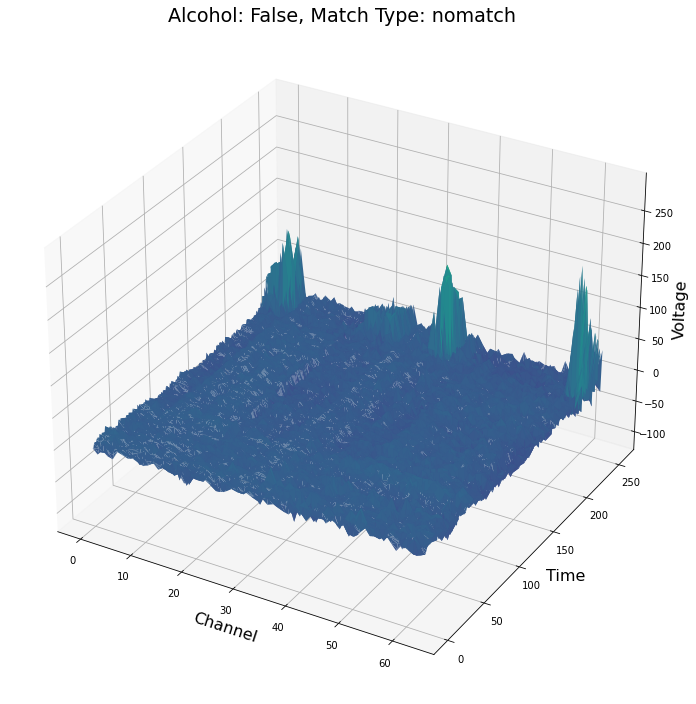

In [7]:
excludeList = ['time', 'trial_no', 'patient_no', 'alcoholic', 'match', 'err', 'file_loc']
channels = [col for col in data.columns.tolist() if col not in excludeList]
tempDF = data[channels]

maxVal = tempDF.to_numpy().max()

minVal = tempDF.to_numpy().min()

for patient_no in data['patient_no'].unique().tolist():
    df = data[data['patient_no'] == patient_no]
    df = df.reset_index()
    alcohol_type = df['alcoholic'][0]
    match_type = df['match'][0]
    plt_title = 'Alcohol: {}, Match Type: {}'.format(alcohol_type, match_type)
    
    df = df.drop (columns = ['trial_no','patient_no', 'alcoholic', 'match', 'err', 'file_loc', 'index'])
    
    threeDimensional_df = threeDimensional_dfprep (df)
    plot_threeDimensional_df (threeDimensional_df, plt_title, minVal, maxVal)
    
    
    